In [1]:
import numpy as np
import h5py as h5
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def readH5(fileName,chanName):
    data = pd.DataFrame()
    for key in chanName:
        data[key] = h5.File(fileName, "r")[key]
    return data

In [3]:
def pl(data, y, y2=None, idx1=0, idx2=-1, ylog=False, y2log=False):
    if y2 == None:
        %matplotlib widget
        fig, axs = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
        axs.plot(data[y][idx1:idx2], color='blue')
        if ylog == True:
            axs.set_yscale('log')
        plt.show()
    elif y2 != None:
        %matplotlib widget
        fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
        axs[0].plot(data[y][idx1:idx2], color='blue')
        axs[1].plot(data[y2][idx1:idx2], color='red')
        if ylog == True:
            axs[0].set_yscale('log')
        if y2log == True:
            axs[1].set_yscale('log')
        
        plt.show()

In [4]:
p5607 = readH5('p5607/p5607_r.hdf5', ['perm', 'effNS', 'int disp'])
p5608 = readH5('p5608/p5608_r.hdf5', ['perm', 'effNS', 'int disp'])
p5642 = readH5('p5642/p5642_r.hdf5', ['perm', 'effNS', 'int disp'])
p5704 = readH5('p5704/p5704_r.hdf5', ['perm', 'effNS', 'int disp'])
p5708 = readH5('p5708/p5708_r.hdf5', ['perm', 'effNS', 'int disp'])
p5721 = readH5('p5721/p5721_r.hdf5', ['perm', 'effNS', 'int disp'])
p5727 = readH5('p5727/p5727_r.hdf5', ['perm', 'effNS', 'int disp'])
p5728 = readH5('p5728/p5728_r.hdf5', ['perm', 'effNS', 'int disp'])
p5729 = readH5('p5729/p5729_r.hdf5', ['perm', 'effNS', 'int disp'])

In [5]:
# pl(p5641, y='effNS', y2='perm', idx1=0, idx2=-1, ylog=False, y2log=True)

In [6]:
def getAvg(data, key, idxs):
    idxs = np.reshape(idxs,(-1,2))
    avg = np.array(list(map(lambda x: np.nanmean(data[key][idxs[x,0]:idxs[x,1]]), np.arange(len(idxs)))))
    err = np.array(list(map(lambda x: np.nanstd(data[key][idxs[x,0]:idxs[x,1]]), np.arange(len(idxs)))))
    return avg, err

In [7]:
p5607idx = np.array([157309, 2794200, 2864824, 5479730, 5502984, 8135275, 8141030, 10786084, 10789225, 13443184, 13444605, 14068355, 14070509, 14683667, 14685256, 15623428, 15624907, 16218683])
p5608idx = np.array([59367, 2668264, 2673970, 5293190, 5296310, 7936280, 7937957, 10566650, 10568550, 13210404, 13214996, 13941390, 13942671, 14544525, 14546013, 15136804, 15138441, 17770267])
p5642idx = np.array([110235, 933061, 937742, 1767499, 1770453, 2596237, 2602385, 3430098, 3433089, 4259842, 4315750, 5151111, 5162189, 6073751])
p5704idx = np.array([82000, 132728, 181110, 240490, 268870, 331810, 389460, 447780, 474670, 533820, 560790, 621750, 644680, 703820, 728490, 786470, 802230, 861870])
p5708idx = np.array([92400, 157600, 318600, 393580, 508100, 574670, 663630, 732180, 824090, 884440])

In [8]:
p5721idx = np.array([37740, 108000, 181900, 254400, 328800, 403300, 481100, 556800])
p5721idx = np.tile(p5721idx,(2,1))
p5721idx[1,:] = p5721idx[1,:] + (100*60*9.25)
p5721idx = p5721idx.T.flatten()

In [9]:
p5727idx = np.array([108490, 117317, 211496, 218118])
p5728idx = np.array([26718, 35162, 147983, 156269])
p5729idx = np.array([284570, 370000, 1717448, 18032280])

In [10]:
p5607avgPerm, p5607errPerm = getAvg(p5607, 'perm', p5607idx)
p5608avgPerm, p5608errPerm = getAvg(p5608, 'perm', p5608idx)
p5642avgPerm, p5642errPerm = getAvg(p5642, 'perm', p5642idx)
p5704avgPerm, p5704errPerm = getAvg(p5704, 'perm', p5704idx)
p5708avgPerm, p5708errPerm = getAvg(p5708, 'perm', p5708idx)
p5721avgPerm, p5721errPerm = getAvg(p5721, 'perm', p5721idx)
p5727avgPerm, p5727errPerm = getAvg(p5727, 'perm', p5727idx)
p5728avgPerm, p5728errPerm = getAvg(p5728, 'perm', p5728idx)
p5729avgPerm, p5729errPerm = getAvg(p5729, 'perm', p5729idx)

p5607avgRelPerm = (p5607avgPerm-p5607avgPerm[0])/p5607avgPerm[0] * 100
p5608avgRelPerm = (p5608avgPerm-p5608avgPerm[0])/p5608avgPerm[0] * 100
p5642avgRelPerm = (p5642avgPerm-p5642avgPerm[0])/p5642avgPerm[0] * 100
p5704avgRelPerm = (p5704avgPerm-p5704avgPerm[0])/p5704avgPerm[0] * 100
p5708avgRelPerm = (p5708avgPerm-p5708avgPerm[0])/p5708avgPerm[0] * 100
p5721avgRelPerm = (p5721avgPerm-p5721avgPerm[0])/p5721avgPerm[0] * 100
p5727avgRelPerm = (p5727avgPerm-p5727avgPerm[0])/p5727avgPerm[0] * 100
p5728avgRelPerm = (p5728avgPerm-p5728avgPerm[0])/p5728avgPerm[0] * 100
p5729avgRelPerm = (p5729avgPerm-p5729avgPerm[0])/p5729avgPerm[0] * 100

In [11]:
p5607avgDisp, p5607errDisp = getAvg(p5607, 'int disp', p5607idx)
p5608avgDisp, p5608errDisp = getAvg(p5608, 'int disp', p5608idx)
p5642avgDisp, p5642errDisp = getAvg(p5642, 'int disp', p5642idx)
p5704avgDisp, p5704errDisp = getAvg(p5704, 'int disp', p5704idx)
p5708avgDisp, p5708errDisp = getAvg(p5708, 'int disp', p5708idx)
p5721avgDisp, p5721errDisp = getAvg(p5721, 'int disp', p5721idx)

p5607avgDisp -= p5607avgDisp[0]
p5608avgDisp -= p5608avgDisp[0]
p5642avgDisp -= p5642avgDisp[0]
p5704avgDisp -= p5704avgDisp[0]
p5708avgDisp -= p5708avgDisp[0]
p5721avgDisp -= p5721avgDisp[0]

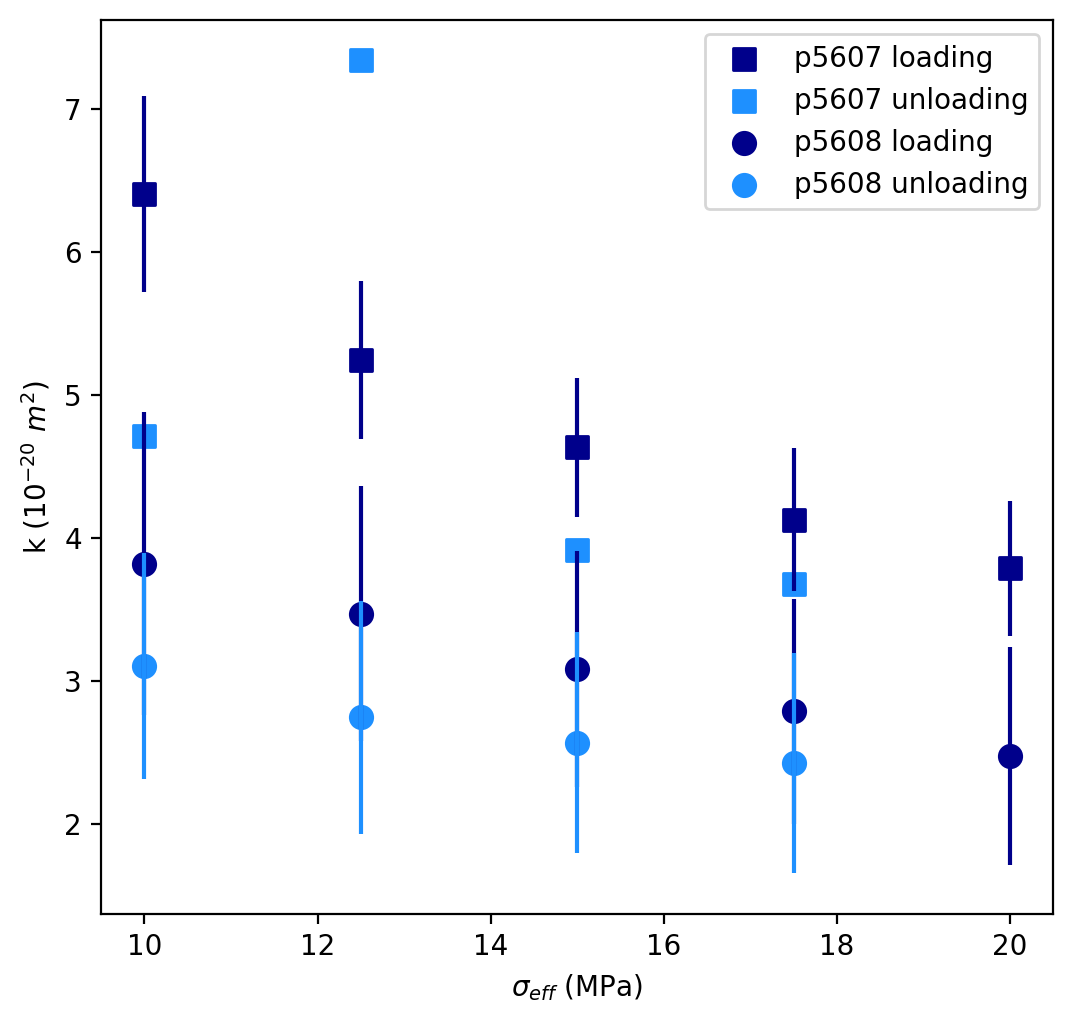

In [12]:
%matplotlib inline
fig, axs = plt.subplots(1, 1, figsize=(5.25, 5), sharex=True, dpi=200, constrained_layout=True)
axs.scatter([10, 12.5, 15, 17.5, 20], p5607avgPerm[0:5]*1e20, color='darkblue', s=65, label='p5607 loading', marker='s')
axs.errorbar([10, 12.5, 15, 17.5, 20], p5607avgPerm[0:5]*1e20, yerr=p5607errPerm[0:5]*1e20, color='darkblue', ls='')
axs.scatter([17.5, 15, 12.5, 10], p5607avgPerm[5:]*1e20, color='dodgerblue', s=65, label='p5607 unloading', marker='s')
axs.errorbar([17.5, 15, 12.5, 10], p5607avgPerm[5:]*1e20, yerr=p5607errPerm[5:], color='dodgerblue', ls='')

axs.scatter([10, 12.5, 15, 17.5, 20], p5608avgPerm[0:5]*1e20, color='darkblue', s=65, label='p5608 loading', marker='o')
axs.errorbar([10, 12.5, 15, 17.5, 20], p5608avgPerm[0:5]*1e20, yerr=p5608errPerm[0:5]*1e20, color='darkblue', ls='')
axs.scatter([17.5, 15, 12.5, 10], p5608avgPerm[5:]*1e20, color='dodgerblue', s=65, label='p5608 unloading', marker='o')
axs.errorbar([17.5, 15, 12.5, 10], p5608avgPerm[5:]*1e20, yerr=p5608errPerm[5:]*1e20, color='dodgerblue', ls='')
axs.legend()
axs.set_xlabel('$\sigma_{eff}$ (MPa)')
axs.set_ylabel('k ($10^{-20}\ m^2$)')
plt.show()

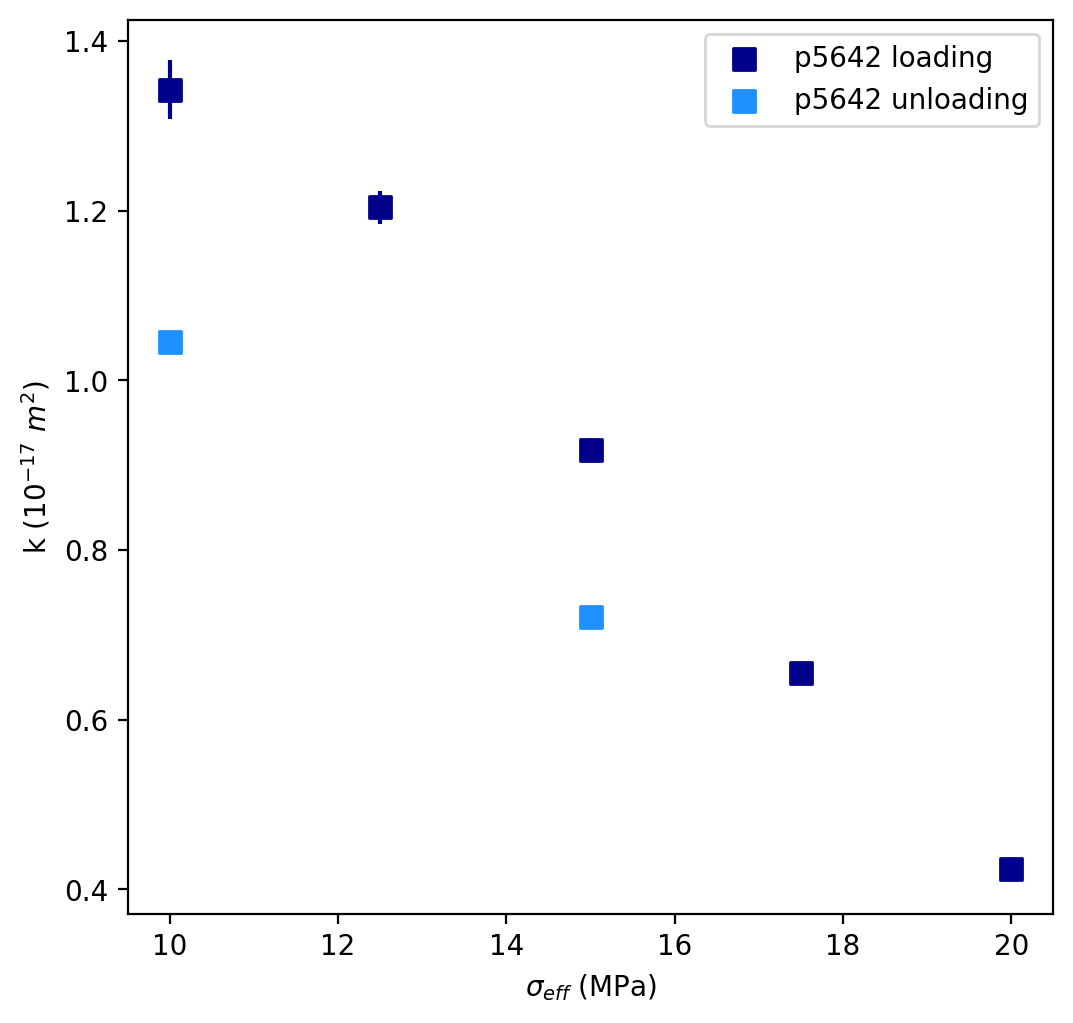

In [13]:
%matplotlib inline
fig, axs = plt.subplots(1, 1, figsize=(5.25, 5), sharex=True, dpi=200, constrained_layout=True)
axs.scatter([10, 12.5, 15, 17.5, 20], p5642avgPerm[0:5]*1e17, color='darkblue', s=65, label='p5642 loading', marker='s')
axs.errorbar([10, 12.5, 15, 17.5, 20], p5642avgPerm[0:5]*1e17, yerr=p5642errPerm[0:5]*1e17, color='darkblue', ls='')
axs.scatter([15, 10], p5642avgPerm[5:]*1e17, color='dodgerblue', s=65, label='p5642 unloading', marker='s')
axs.errorbar([15, 10], p5642avgPerm[5:]*1e17, yerr=p5642errPerm[5:], color='dodgerblue', ls='')
axs.legend()
axs.set_xlabel('$\sigma_{eff}$ (MPa)')
axs.set_ylabel('k ($10^{-17}\ m^2$)')
plt.show()

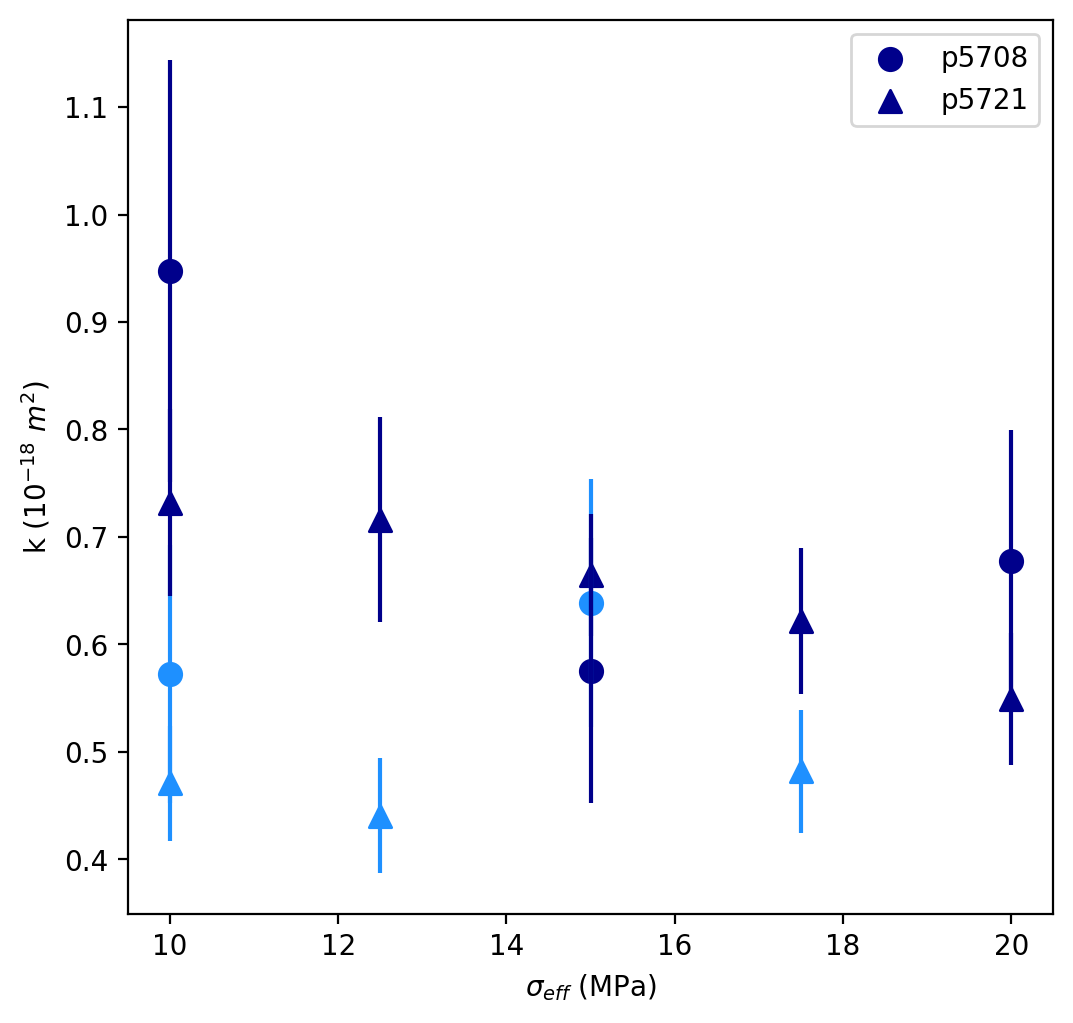

In [14]:
%matplotlib inline
fig, axs = plt.subplots(1, 1, figsize=(5.25, 5), sharex=True, dpi=200, constrained_layout=True)
# axs.scatter([10, 12.5, 15, 17.5, 20], p5704avgPerm[0:5]*1e18, color='darkblue', s=65, label='p5704', marker='s')
# axs.errorbar([10, 12.5, 15, 17.5, 20], p5704avgPerm[0:5]*1e18, yerr=p5704errPerm[0:5]*1e18, color='darkblue', ls='')
# axs.scatter([17.5, 15, 12.5, 10], p5704avgPerm[5:]*1e18, color='dodgerblue', s=65, marker='s')
# axs.errorbar([17.5, 15, 12.5, 10], p5704avgPerm[5:]*1e18, yerr=p5704errPerm[5:], color='dodgerblue', ls='')

axs.scatter([10, 15, 20], p5708avgPerm[0:3]*1e18, color='darkblue', s=65, label='p5708', marker='o')
axs.errorbar([10,15,20], p5708avgPerm[0:3]*1e18, yerr=p5708errPerm[0:3]*1e18, color='darkblue', ls='', zorder=4)
axs.scatter([15, 10], p5708avgPerm[3:]*1e18, color='dodgerblue', s=65, marker='o')
axs.errorbar([15,10], p5708avgPerm[3:]*1e18, yerr=p5708errPerm[3:]*1e18, color='dodgerblue', ls='')

axs.scatter([10, 12.5, 15, 17.5, 20], p5721avgPerm[0:5]*1e18, color='darkblue', s=65, label='p5721', marker='^')
axs.errorbar([10, 12.5, 15, 17.5, 20], p5721avgPerm[0:5]*1e18, yerr=p5721errPerm[0:5]*1e18, color='darkblue', ls='', zorder=4)
axs.scatter([17.5, 12.5, 10], p5721avgPerm[5:]*1e18, color='dodgerblue', s=65, marker='^')
axs.errorbar([17.5, 12.5, 10], p5721avgPerm[5:]*1e18, yerr=p5721errPerm[5:]*1e18, color='dodgerblue', ls='')

# axs.scatter([10, 20], p5727avgPerm*1e18, color='darkblue', s=65, label='p5727', marker='s')
# axs.errorbar([10, 20], p5727avgPerm*1e18, yerr=p5727errPerm*1e18, color='darkblue', ls='', zorder=4)

axs.legend()
axs.set_xlabel('$\sigma_{eff}$ (MPa)')
axs.set_ylabel('k ($10^{-18}\ m^2$)')
plt.show()

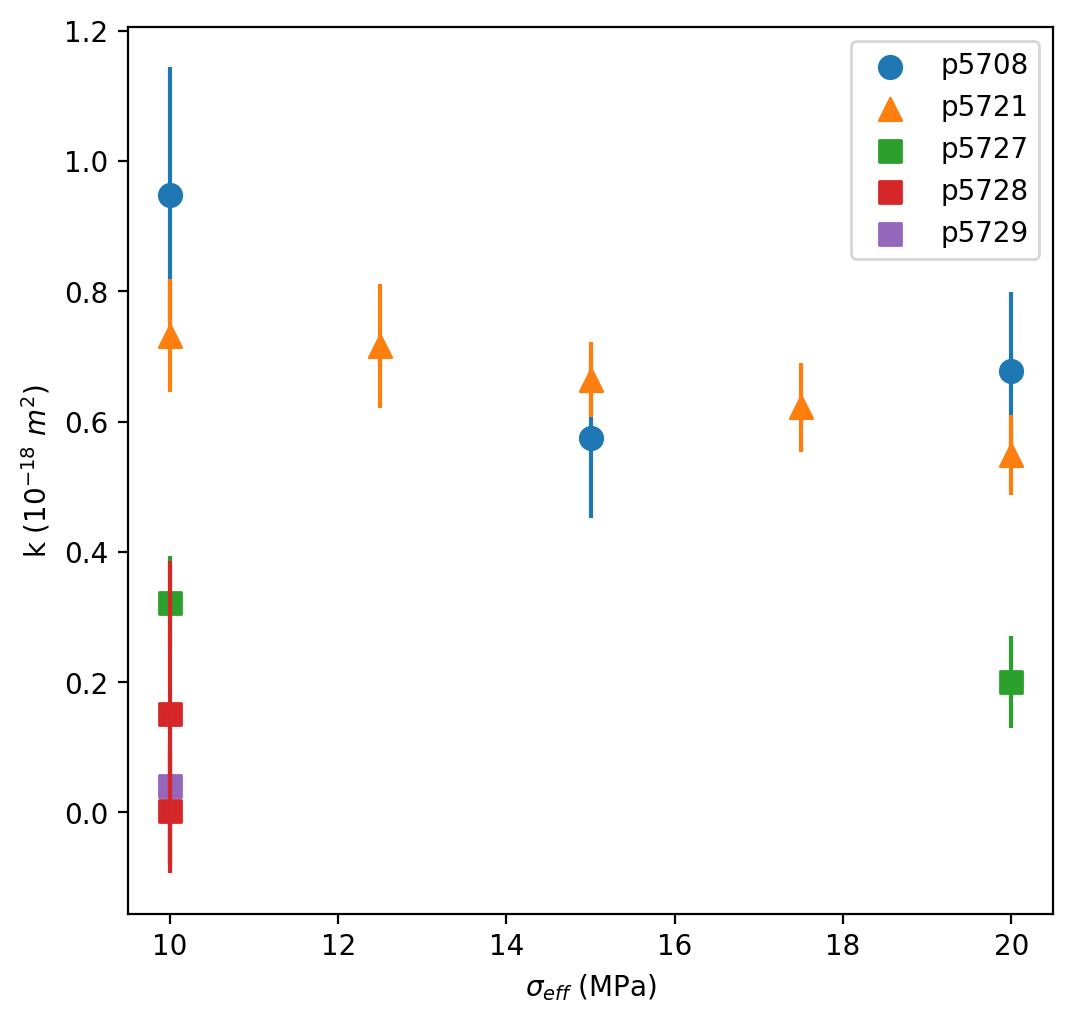

In [17]:
%matplotlib inline
fig, axs = plt.subplots(1, 1, figsize=(5.25, 5), sharex=True, dpi=200, constrained_layout=True)

axs.scatter([10, 15, 20], p5708avgPerm[0:3]*1e18, s=65, label='p5708', marker='o')
axs.errorbar([10,15,20], p5708avgPerm[0:3]*1e18, yerr=p5708errPerm[0:3]*1e18, ls='', zorder=4)

axs.scatter([10, 12.5, 15, 17.5, 20], p5721avgPerm[0:5]*1e18, s=65, label='p5721', marker='^')
axs.errorbar([10, 12.5, 15, 17.5, 20], p5721avgPerm[0:5]*1e18, yerr=p5721errPerm[0:5]*1e18, ls='', zorder=4)

axs.scatter([10, 20], p5727avgPerm*1e18, s=65, label='p5727', marker='s')
axs.errorbar([10, 20], p5727avgPerm*1e18, yerr=p5727errPerm*1e18, ls='', zorder=4)

axs.scatter([10, 10], p5728avgPerm*1e18, s=65, label='p5728', marker='s')
axs.errorbar([10, 10], p5728avgPerm*1e18, yerr=p5728errPerm*1e18, ls='', zorder=4)

axs.scatter([10], p5729avgPerm[1]*1e18, s=65, label='p5729', marker='s')
axs.errorbar([10], p5729avgPerm[1]*1e18, yerr=p5729errPerm[1]*1e18, ls='', zorder=3)

axs.legend()
axs.set_xlabel('$\sigma_{eff}$ (MPa)')
axs.set_ylabel('k ($10^{-18}\ m^2$)')
plt.show()

In [ ]:
p5729avgPerm, p5729errPerm

(array([3.84720508e-20, 3.01268264e-19]),
 array([1.54104967e-20, 1.61865708e-18]))

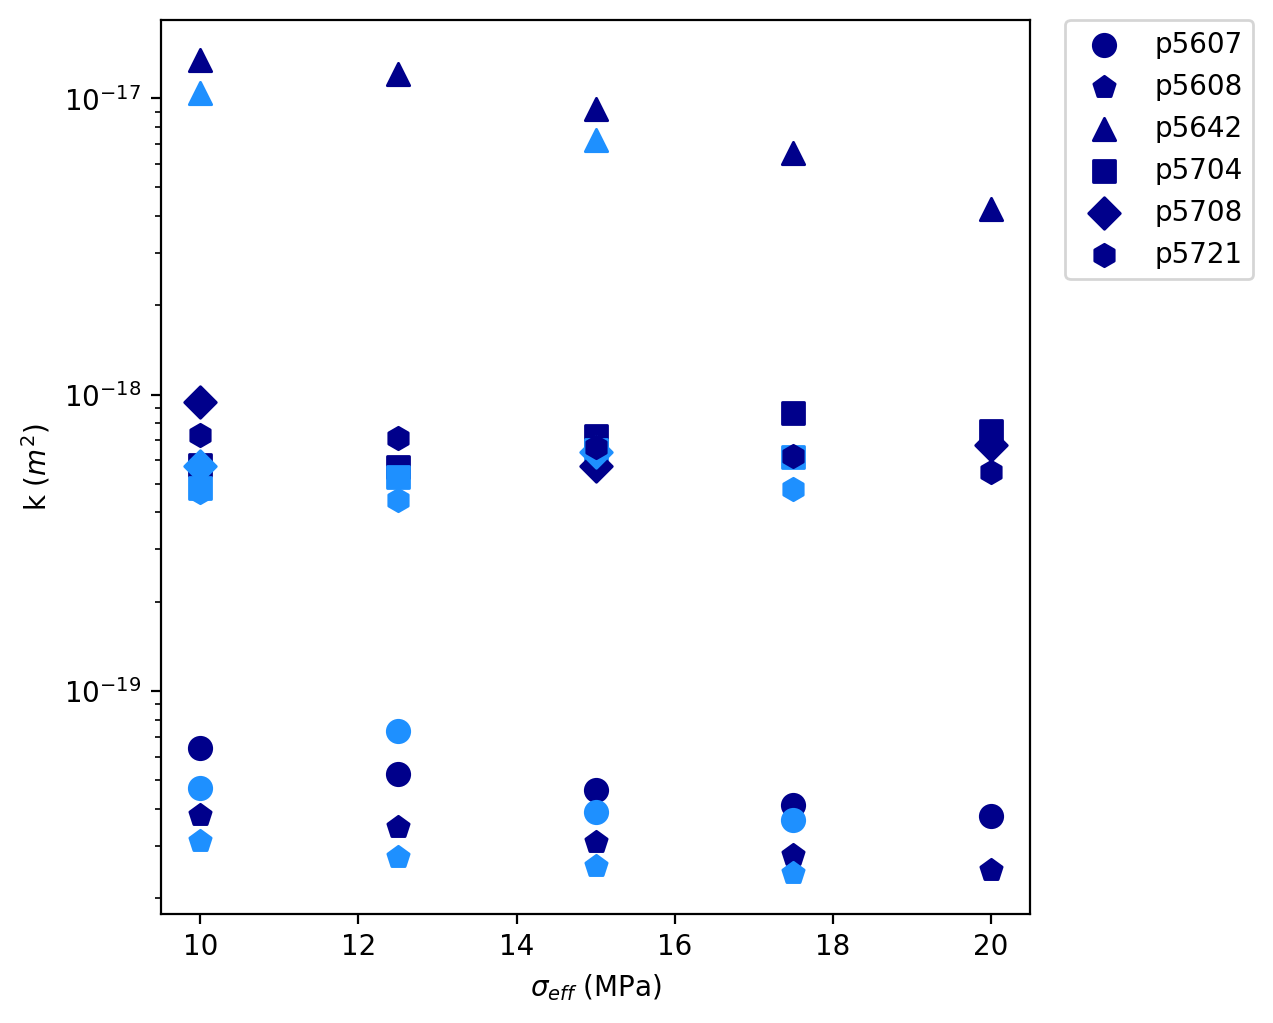

In [32]:
%matplotlib inline
fig, axs = plt.subplots(1, 1, figsize=(6.25, 5), sharex=True, dpi=200, constrained_layout=True)
axs.scatter([10, 12.5, 15, 17.5, 20], p5607avgPerm[0:5], color='darkblue', s=65, label='p5607')
axs.scatter([17.5, 15, 12.5, 10], p5607avgPerm[5:], color='dodgerblue', s=65)
axs.scatter([10, 12.5, 15, 17.5, 20], p5608avgPerm[0:5], color='darkblue', s=65, label='p5608', marker='p')
axs.scatter([17.5, 15, 12.5, 10], p5608avgPerm[5:], color='dodgerblue', s=65, marker='p')
axs.scatter([10, 12.5, 15, 17.5, 20], p5642avgPerm[0:5], color='darkblue', s=65, label='p5642', marker='^')
axs.scatter([15, 10], p5642avgPerm[5:], color='dodgerblue', s=65, marker='^')
axs.scatter([10, 12.5, 15, 17.5, 20], p5704avgPerm[0:5], color='darkblue', s=65, label='p5704', marker='s')
axs.scatter([17.5, 15, 12.5, 10], p5704avgPerm[5:], color='dodgerblue', s=65, marker='s')
axs.scatter([10, 15, 20], p5708avgPerm[0:3], color='darkblue', s=65, label='p5708', marker='D')
axs.scatter([15, 10], p5708avgPerm[3:], color='dodgerblue', s=65, marker='D')
axs.scatter([10, 12.5, 15, 17.5, 20], p5721avgPerm[0:5], color='darkblue', s=65, label='p5721', marker='h')
axs.scatter([17.5, 12.5, 10], p5721avgPerm[5:], color='dodgerblue', s=65, marker='h')
axs.set_yscale('log')
axs.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
axs.set_xlabel('$\sigma_{eff}$ (MPa)')
axs.set_ylabel('k ($m^2$)')
plt.show()

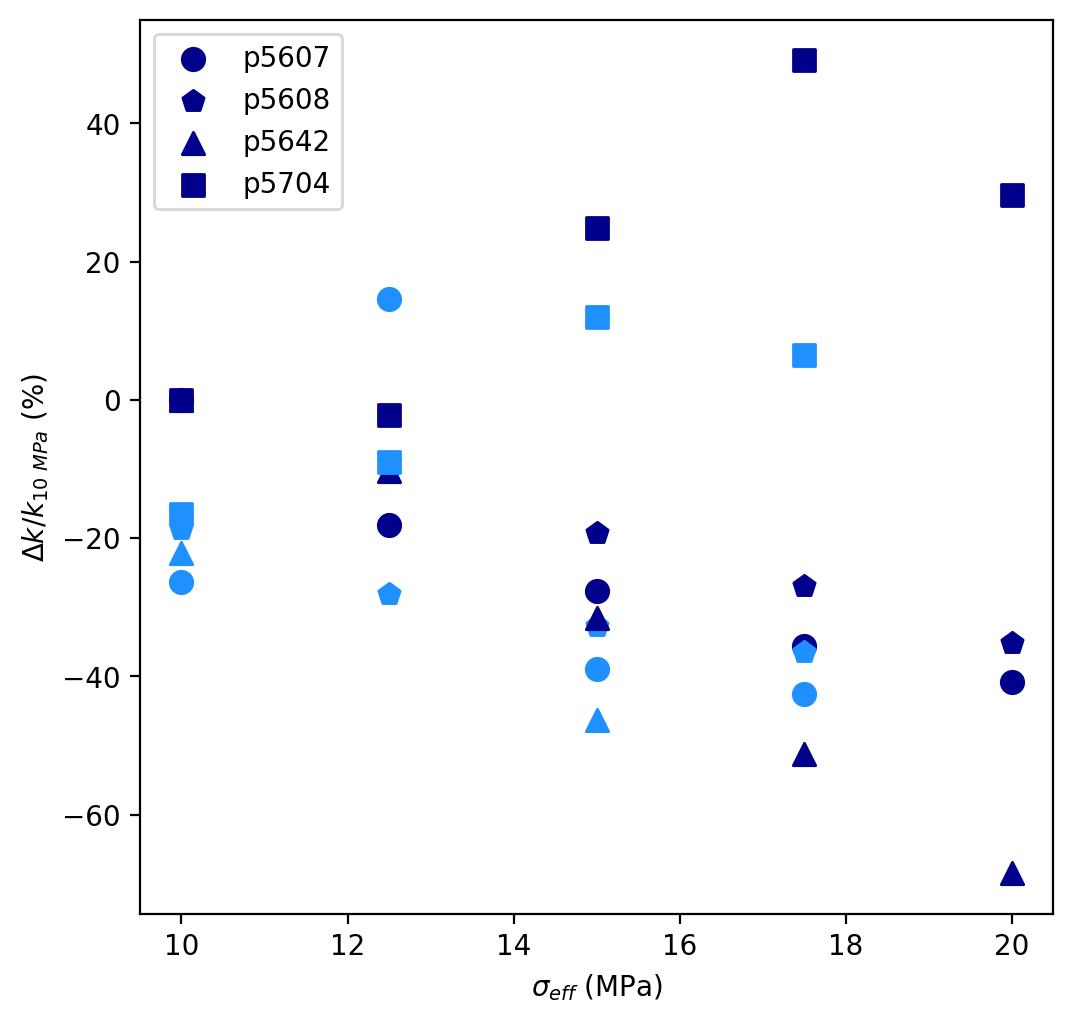

In [28]:
fig, axs = plt.subplots(1, 1, figsize=(5.25, 5), sharex=True, dpi=200, constrained_layout=True)
axs.scatter([10, 12.5, 15, 17.5, 20], p5607avgRelPerm[0:5], color='darkblue', s=65, label='p5607')
axs.scatter([17.5, 15, 12.5, 10], p5607avgRelPerm[5:], color='dodgerblue', s=65)
axs.scatter([10, 12.5, 15, 17.5, 20], p5608avgRelPerm[0:5], color='darkblue', s=65, label='p5608', marker='p')
axs.scatter([17.5, 15, 12.5, 10], p5608avgRelPerm[5:], color='dodgerblue', s=65, marker='p')
axs.scatter([10, 12.5, 15, 17.5, 20], p5642avgRelPerm[0:5], color='darkblue', s=65, label='p5642', marker='^')
axs.scatter([15, 10], p5642avgRelPerm[5:], color='dodgerblue', s=65, marker='^')
axs.scatter([10, 12.5, 15, 17.5, 20], p5704avgRelPerm[0:5], color='darkblue', s=65, label='p5704', marker='s')
axs.scatter([17.5, 15, 12.5, 10], p5704avgRelPerm[5:], color='dodgerblue', s=65, marker='s')
# axs.set_yscale('log')
axs.legend()
axs.set_xlabel('$\sigma_{eff}$ (MPa)')
axs.set_ylabel('$\Delta k/k_{10\ MPa}\ (\%)$')
plt.show()

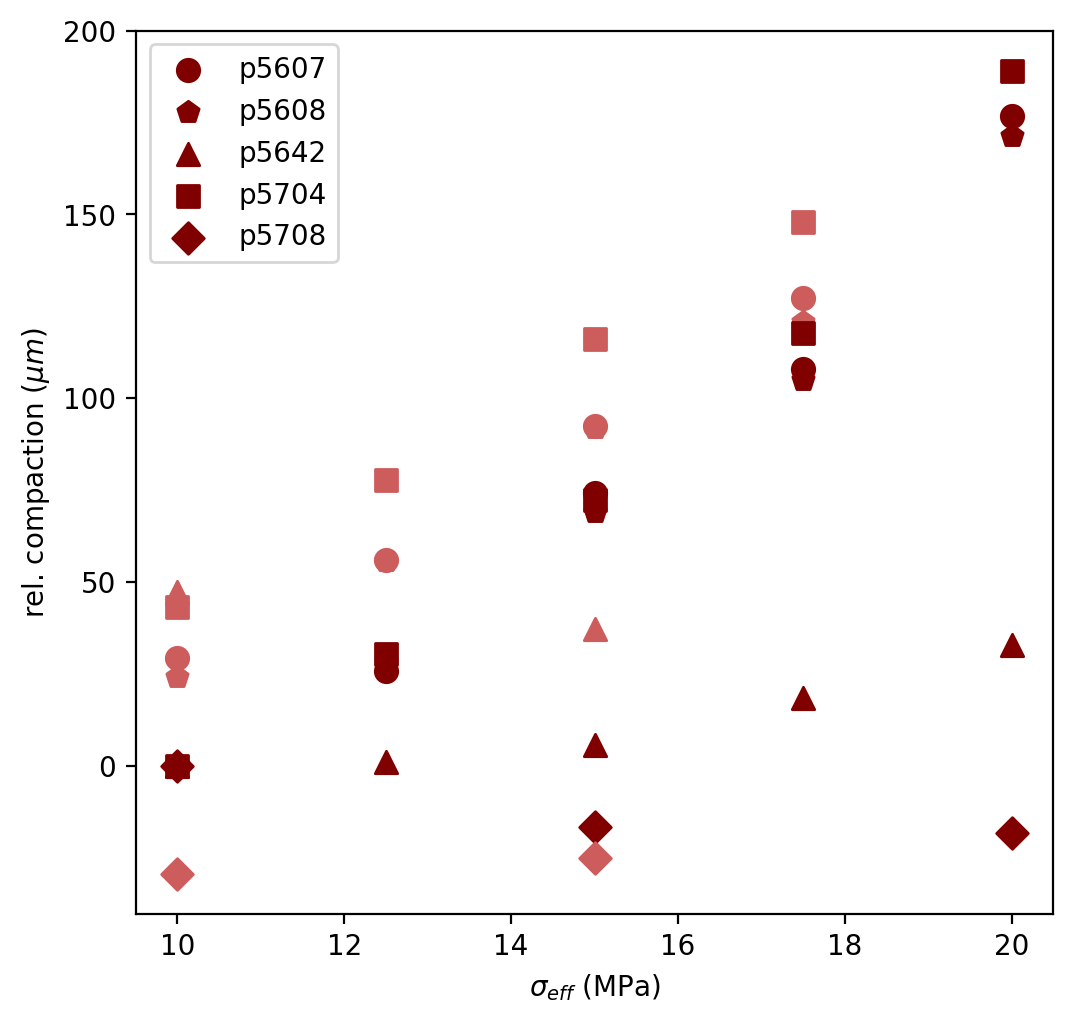

In [30]:
fig, axs = plt.subplots(1, 1, figsize=(5.25, 5), sharex=True, dpi=200, constrained_layout=True)
axs.scatter([10, 12.5, 15, 17.5, 20], p5607avgDisp[0:5], color='maroon', s=65, label='p5607')
axs.scatter([17.5, 15, 12.5, 10], p5607avgDisp[5:], color='indianred', s=65)
axs.scatter([10, 12.5, 15, 17.5, 20], p5608avgDisp[0:5], color='maroon', s=65, label='p5608', marker='p')
axs.scatter([17.5, 15, 12.5, 10], p5608avgDisp[5:], color='indianred', s=65, marker='p')
axs.scatter([10, 12.5, 15, 17.5, 20], p5642avgDisp[0:5], color='maroon', s=65, label='p5642', marker='^')
axs.scatter([15, 10], p5642avgDisp[5:], color='indianred', s=65, marker='^')
axs.scatter([10, 12.5, 15, 17.5, 20], p5704avgDisp[0:5], color='maroon', s=65, label='p5704', marker='s')
axs.scatter([17.5, 15, 12.5, 10], p5704avgDisp[5:], color='indianred', s=65, marker='s')
axs.scatter([10, 15, 20], p5708avgDisp[0:3], color='maroon', s=65, label='p5708', marker='D')
axs.scatter([15, 10], p5708avgDisp[3:], color='indianred', s=65, marker='D')
axs.legend()
axs.set_xlabel('$\sigma_{eff}$ (MPa)')
axs.set_ylabel('rel. compaction ($\mu m$)' )
plt.show()